# **EDA**

In [280]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("spam.csv", encoding=('iso-8859-1'))

In [281]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### **Data Cleaning**


In [282]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
147,ham,Ummma.will call after check in.our life will b...,NaN,NaN,NaN
2999,ham,Id onluy matters when getting on from offcampus,NaN,NaN,NaN
2478,ham,Not yet. Just i'd like to keep in touch and it...,NaN,NaN,NaN
4975,ham,You are gorgeous! keep those pix cumming :) th...,NaN,NaN,NaN
4774,ham,So many people seems to be special at first si...,NaN,NaN,NaN


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


- let's check out Unnamed features

In [284]:
for i in range(2,5):
    print(data[f'Unnamed: {i}'].unique()[:5], '\n\n')


[nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'] 


[nan ' MK17 92H. 450Ppw 16"' ' why to miss them' 'GE'
 'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""'] 


[nan ' just Keep-in-touch\\" gdeve.."' 'GNT:-)"'
 ' Never comfort me with a lie\\" gud ni8 and sweet dreams"'
 ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""'] 




---

- let's remove useless data


In [285]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [287]:
data.sample(5)

,v1,v2
1682,ham,HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
170,ham,"Sir, I need AXIS BANK account no and bank addr..."
4660,ham,Ok no prob...
970,ham,"Yar lor he wan 2 go c horse racing today mah, ..."
1444,ham,Those ducking chinchillas


- let's rename columns


In [288]:
data.rename(columns={'v1':'Targets', 'v2':'Text'}, inplace=True)
data.head()

,Targets,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [289]:
data.Targets.value_counts()

ham     4825
spam     747
Name: Targets, dtype: int64

- let's balance our Data Frame


In [290]:
ham=data[data.Targets=='ham'].sample(747)
spam=data[data.Targets=='spam']


In [291]:
ham.count()
spam.count()

Targets    747
Text       747
dtype: int64

In [292]:
frames = [ham, spam]
data = pd.concat(frames)

----

## converting labels into 0 or 1
- 1 = Spam
- 0 = Ham


In [293]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data.Targets= encoder.fit_transform(data['Targets'])

In [294]:
# Null Values
data.isnull().sum()

Targets    0
Text       0
dtype: int64

In [295]:
## Duplicate values
data.duplicated().sum()

105

In [296]:
## let's remove these values
data.drop_duplicates(keep='first')

,Targets,Text
151,0,Yup i thk cine is better cos no need 2 go down...
1730,0,Doing project w frens lor.
2009,0,I can't keep going through this. It was never ...
1100,0,You busy or can I come by at some point and fi...
2433,0,Indians r poor but India is not a poor country...
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


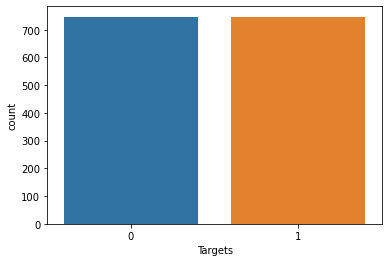

In [297]:
# let's check the percentage of spam or ham
import seaborn as sns
sns.countplot(data.Targets)
plt.show()

# **Feature Engineering** 

In [298]:
#let's count the number of characters
data['char']= data['Text'].apply(len)

In [299]:
data.head()

,Targets,Text,char
151,0,Yup i thk cine is better cos no need 2 go down...,59
1730,0,Doing project w frens lor.,27
2009,0,I can't keep going through this. It was never ...,431
1100,0,You busy or can I come by at some point and fi...,80
2433,0,Indians r poor but India is not a poor country...,632


In [300]:
## for counting words 
import nltk
# nltk.download('punkt')

data['Words count']= data['Text'].apply(lambda x:len( nltk.word_tokenize(x)))

In [301]:
data['Sentences count']= data['Text'].apply(lambda x:len( nltk.sent_tokenize(x)))
data.sample(15)

,Targets,Text,char,Words count,Sentences count
3172,1,"Dear Voucher Holder, To claim this weeks offer...",114,25,2
419,1,Send a logo 2 ur lover - 2 names joined by a h...,159,34,3
3655,0,Oh really?? Did you make it on air? What's you...,55,16,3
4196,1,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,158,30,2
2533,0,Glad it went well :) come over at 11 then we'l...,95,23,1
4455,0,If you want to mapquest it or something look u...,68,14,1
2015,0,Just re read it and I have no shame but tell m...,138,36,2
3673,1,You have won a Nokia 7250i. This is what you g...,150,31,4
3805,1,URGENT! We are trying to contact you. Last wee...,159,32,6
2426,1,Valentines Day Special! Win over å£1000 in our...,158,31,5


---

### **Graphs**

In [302]:
# data.iloc[:, 2:].describe()
ham = data[data['Targets']==0][['char', 'Words count', 'Sentences count']]
spam =  data[data['Targets']==1][['char', 'Words count', 'Sentences count']]

<AxesSubplot:ylabel='Count'>

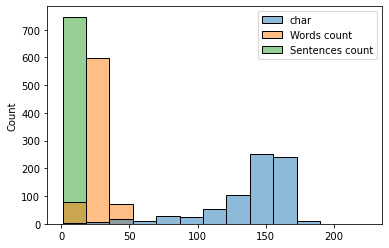

In [303]:
sns.histplot(spam)

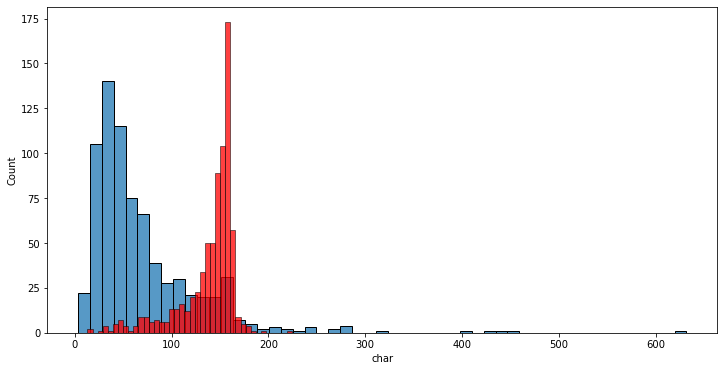

In [304]:
plt.figure(figsize=(12,6))
sns.histplot(ham['char'])
sns.histplot(spam['char'], color ='r')
plt.show()

* as we can see in spam, the no of charaters are less 

<AxesSubplot:>

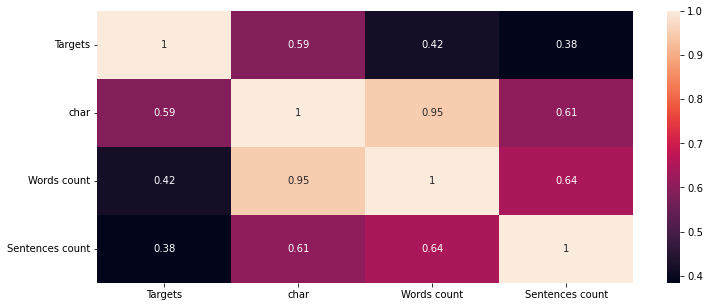

In [305]:
# now let's make an correlation 
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), annot=True)

---

## **Data Transformation**

In [306]:
def Transform_text(text):
   T = text.lower()
   T = nltk.word_tokenize(text)
   ## for removing special charaters 
   l=[]
   for i in text:
      if i.isalnum(): ## just alphabet and numbers are allowed
         l.append(i)
   
   return l

In [307]:
Transform_text("HI my name && is Abu-Ubaida")

['H',
 'I',
 'm',
 'y',
 'n',
 'a',
 'm',
 'e',
 'i',
 's',
 'A',
 'b',
 'u',
 'U',
 'b',
 'a',
 'i',
 'd',
 'a']

In [308]:
#  stop word are the words which don't put any value into our prediction like is, the etc. for this we will use 

from nltk.corpus import stopwords
# nltk.download('stopwords') 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

* these are the stops words

In [309]:
# for punctuation 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [310]:
def Transform_text(text):
   T = text.lower()
   T = nltk.word_tokenize(text)

   ## for removing special characters 
   List=[]   # to store all char
   for i in T:
      if i.isalnum(): ## just alphabet and numbers are allowed
         List.append(i)
   T = List[:] ## as list is immutable so will have to copy like this or .copy()
   List.clear() # to use it again
   
   ## let's check for other conditions 
   for i in T:
      if i not in stopwords.words('english') and i not in string.punctuation:
         List.append(i)

   return List

In [311]:
Transform_text("HI my  name is %% the was the if yousuf are  Abu Uabdsfa")

['HI', 'name', 'yousuf', 'Abu', 'Uabdsfa']

In [312]:
## Stemming, here we just get the dictionary form of word
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dancing") # like 


'danc'

In [313]:
# dir(PorterStemmer())

In [314]:
def Transform_text(text):
   T = text.lower()  
   T = nltk.word_tokenize(text) ## for getting single single words

   ## for removing special characters 
   List=[]   # to store all char
   for i in T:
      if i.isalnum(): ## just alphabet and numbers are allowed
         List.append(i)
   T = List[:] ## as list is immutable so will have to copy like this or .copy()
   List.clear() # to use it again
   
   ## let's check for other conditions 
   for i in T:
      if i not in stopwords.words('english') and i not in string.punctuation:
         List.append(i)
   text = List[:]; List.clear()

   ## for stemming 
   for i in text:
      List.append(ps.stem(i))
   return " ".join(List)  ## to get as a string of list

In [315]:
Transform_text("HI dearing &&ed  my iS name hiii ? what is your Nmae ")

'hi dear ed is name hiii nmae'

In [316]:
## let's check our function will real data 
a = data['Text'][0]
print(a, end='\n\n')
Transform_text(a)

KeyError: 0

In [ ]:
## As we wanted to get the Transform list
data['Transformed_text'] = data['Text'].apply(Transform_text)

In [ ]:
data.head()

,Targets,Text,char,Words count,Sentences count,Transformed_text
2544,0,She is our sister.. She belongs 2 our family.....,289,71,4,she sister she belong 2 famili she hope tomorr...
3974,0,do u think that any girl will propose u today ...,132,21,1,u think girl propos u today se ur bloodi funki...
1170,0,"Yeah, we can probably swing by once my roommat...",73,15,1,yeah probabl swing roommat finish girl
3201,0,Okay lor... Wah... like that def they wont let...,110,26,1,okay lor wah like def wont let us go haha what...
547,0,"Sorry that took so long, omw now",32,8,1,sorri took long omw


---
---

* Now let's make and word image from wordcloud library of Tranformed_text. This is how we see the most frequent word in the list.m

## **Image graph**

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color = 'white')

In [ ]:
spam = wc.generate(data[data['Targets']==1]['Transformed_text'].str.cat(sep=" "))

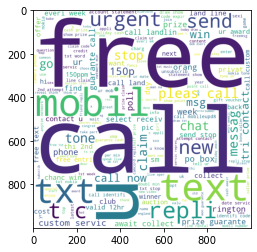

In [ ]:
## to see the image or graph.figure(figsize=(15,10))
plt.imshow(spam)

----

In [ ]:
## for ham messages
ham = wc.generate(data[data['Targets']==0]['Transformed_text'].str.cat(sep=" "))

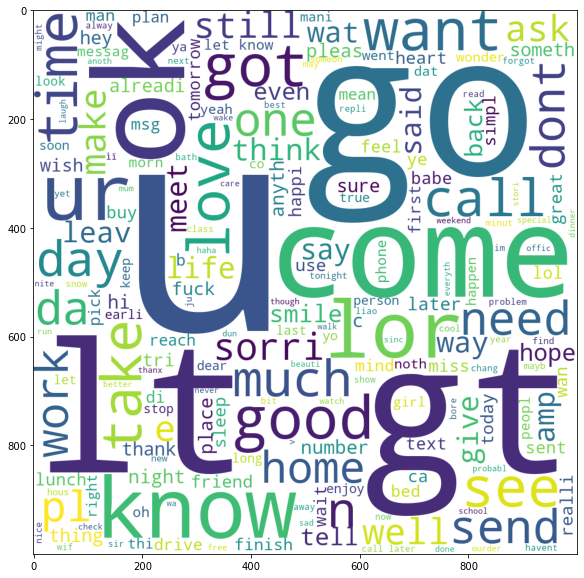

In [ ]:
## to see the image or graph
plt.figure(figsize=(15,10))
plt.imshow(ham)

-----

- for finding the most 30% words in the text, here we go 


In [ ]:
record=[]
for msg in data[data['Targets']==1]['Transformed_text'].tolist():
   for word in msg.split():
      record.append(word)

In [ ]:
len(record)
record

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'i',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'as',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'to',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'had',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'the',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 'from',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 'you',
 '1',
 'week',
 'free',
 'membership',
 '

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


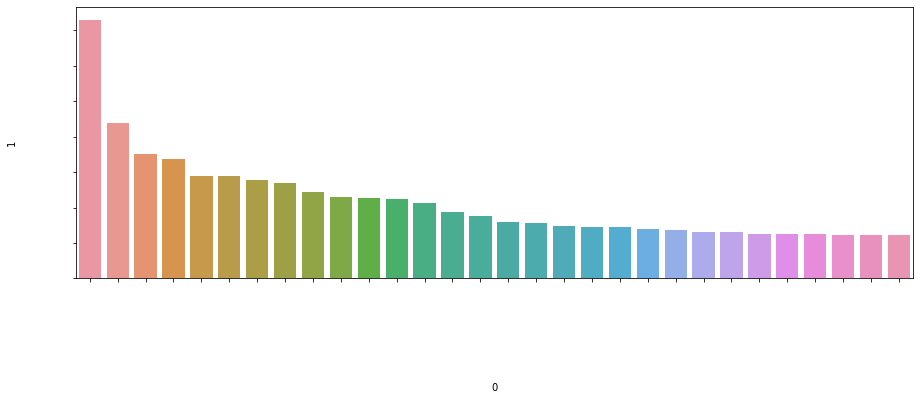

In [ ]:
from collections import Counter
a= Counter(record).most_common(30)
df = pd.DataFrame(a)

## plotting 
plt.figure(figsize=(15,5))
plt.xticks(color = 'w', size=25, rotation=90)
plt.yticks(color = 'w', size=25)
sns.barplot(df[0], df[1])
plt.show()

## for Ham

In [ ]:
record_ham=[]
for msg in data[data['Targets']==0]['Transformed_text'].tolist():
   for word in msg.split():
      record_ham.append(word)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


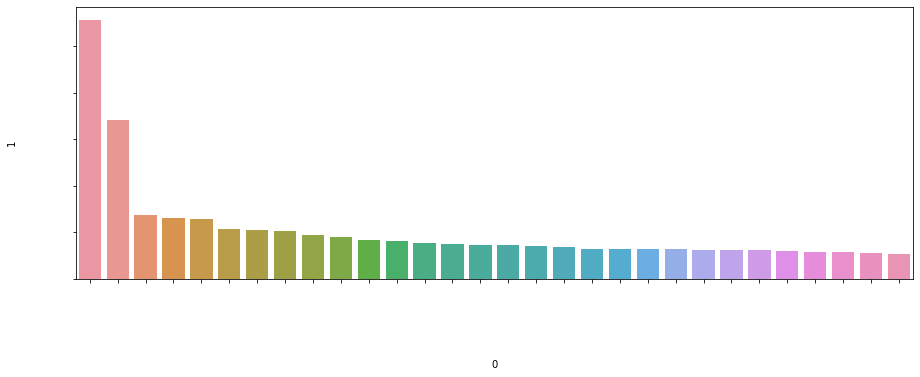

In [ ]:
from collections import Counter
a= Counter(record_ham).most_common(30)
df1 = pd.DataFrame(a)
# df1


## plotting 
plt.figure(figsize=(15,5))
plt.xticks(color = 'w', size=25, rotation=90)
plt.yticks(color = 'w', size=25)
sns.barplot(df1[0], df1[1])
plt.show()

----
---

#### **Vectorization** 


In [ ]:
## as we know that our model does'nt accepts text as a input, so now we will convert this text into vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(data['Transformed_text']).toarray()
X.shape

(1494, 3721)

In [ ]:
y = data['Targets'].values
y.shape

(1494,)

### **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = gnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Gaussion NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Gaussion NB

confusion Matrix [[140   5]
 [ 14 140]]
Precison Score 0.9655172413793104
Accuracy_score 0.9364548494983278


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = bnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Bernoulli NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Bernoulli NB

confusion Matrix [[144   1]
 [ 15 139]]
Precison Score 0.9928571428571429
Accuracy_score 0.9464882943143813


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = mnb.fit(X_train, y_train)
pred1 = model.predict(X_test)

print("Multinomial NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))

## here percison Score matters alot, as it's a unbalance Data

Multinomial NB

confusion Matrix [[137   8]
 [ 10 144]]
Precison Score 0.9473684210526315
Accuracy_score 0.939799331103679


----

## **Tfidf Vectorizer** 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf  = TfidfVectorizer(max_features=3000)
X = tf.fit_transform(data['Transformed_text']).toarray()
X.shape

(1494, 3000)

In [ ]:
y = data['Targets'].values

### **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = gnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Gaussion NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Gaussion NB

confusion Matrix [[135  10]
 [ 13 141]]
Precison Score 0.9337748344370861
Accuracy_score 0.9230769230769231


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = bnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Bernoulli NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Bernoulli NB

confusion Matrix [[144   1]
 [ 15 139]]
Precison Score 0.9928571428571429
Accuracy_score 0.9464882943143813


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = mnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Multinomial NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Multinomial NB

confusion Matrix [[140   5]
 [  9 145]]
Precison Score 0.9666666666666667
Accuracy_score 0.9531772575250836


---
---

## **other algorithms**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
irc = LogisticRegression(solver='liblinear', random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs= {'SVC':svc, 'KNC':knc, "DTC":dtc, 'IRC':irc, 'RFC':rfc,"ABC":abc, "BC":bc, "ETC":etc, "GBDT":gbdt}

In [ ]:
## let's make function which will get algo and will return precision and accuracy score
def tell_about_algo(algo):
   model=algo.fit(X_train, y_train)
   prediction = model.predict(X_test)
   accuracy = accuracy_score(y_test, prediction)
   precision = precision_score(y_test, prediction)

   return accuracy, precision

In [ ]:
tell_about_algo(svc)

(0.9498327759197325, 0.9727891156462585)

In [ ]:
acc =[]
prc =[]
for values in clfs.values():
   accuracy, precision = tell_about_algo(values)
   acc.append(accuracy)
   prc.append(precision)

df = pd.DataFrame({"Algorithms":clfs.keys(), "Accuracy":acc, "precision":prc })
df

,Algorithms,Accuracy,precision
0,SVC,0.949833,0.972789
1,KNC,0.909699,0.970370
2,DTC,0.852843,0.929688
3,IRC,0.939799,0.978873
4,RFC,0.943144,1.000000
5,ABC,0.899666,0.942857
6,BC,0.903010,0.919463
7,ETC,0.953177,0.986111
8,GBDT,0.882943,0.934307


In [ ]:
df.sort_values(by='precision', ascending=False)

,Algorithms,Accuracy,precision
5,RFC,0.943144,1.000000
8,ETC,0.953177,0.986111
4,IRC,0.939799,0.978873
0,SVC,0.949833,0.972789
1,KNC,0.909699,0.970370
2,MNB,0.953177,0.966667
6,ABC,0.899666,0.942857
9,GBDT,0.882943,0.934307
3,DTC,0.849498,0.922481
7,BC,0.903010,0.919463


---

# **Pickling**

- **Here we have just 3 steps, Transfomation of Text, Vectorizing, and applying Algorithms**

In [ ]:
## let's save these models as files 
import pickle
pickle.dump(tf, open("Vectorizer.pkl", 'wb'))
pickle.dump(bnb, open("model.pkl", 'wb'))
pickle.dump(Transform_text, open("preprocessing.pkl", 'wb'))

---- 